# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definition
1. Data
2. Evaluation
3. Features
4. Modelling
5. Experimentation
   
## 1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
    This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

### Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
5. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

## Preparing the tools

We're going to use pandas, numpy ,Matplotlib and NUmpy for data analysis and manupulation

In [65]:
# Import all the tools we need

# Regular EDA and plotting Librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score
from sklearn import metrics

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

## Data Exploration (exploatory data anylisis or EDA)
The gole here is to find out moreabout data and become a subject matter on the dataset you're working with
1. What questions are we trying to solve ?.
2. What kind of data do we have and how do we treat diffrent types ?
3. What's missing from the data how we deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add change or remove features to get more out of your data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

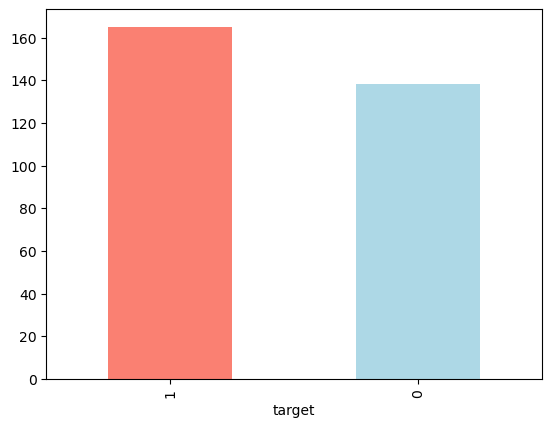

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#Compare target with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


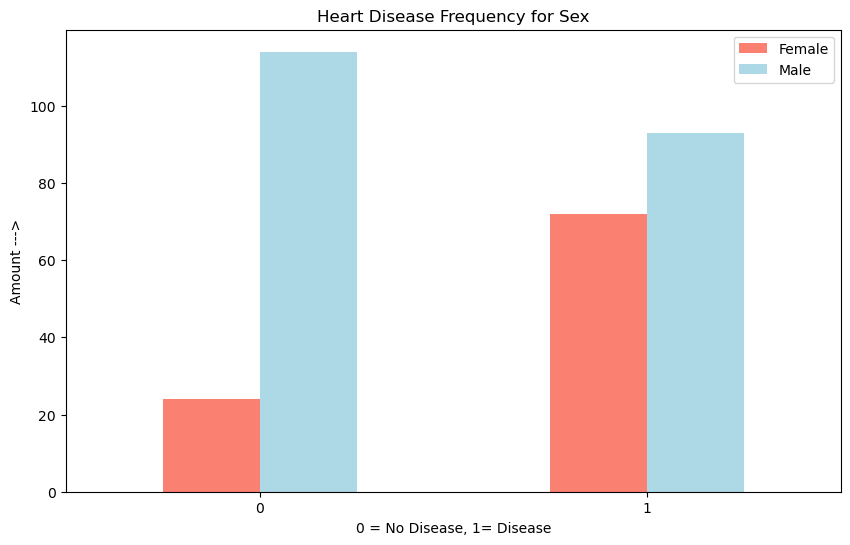

In [12]:
# Create a plot a crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize = (10,6),
                                   color =["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount --->")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);
plt.show()

In [13]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

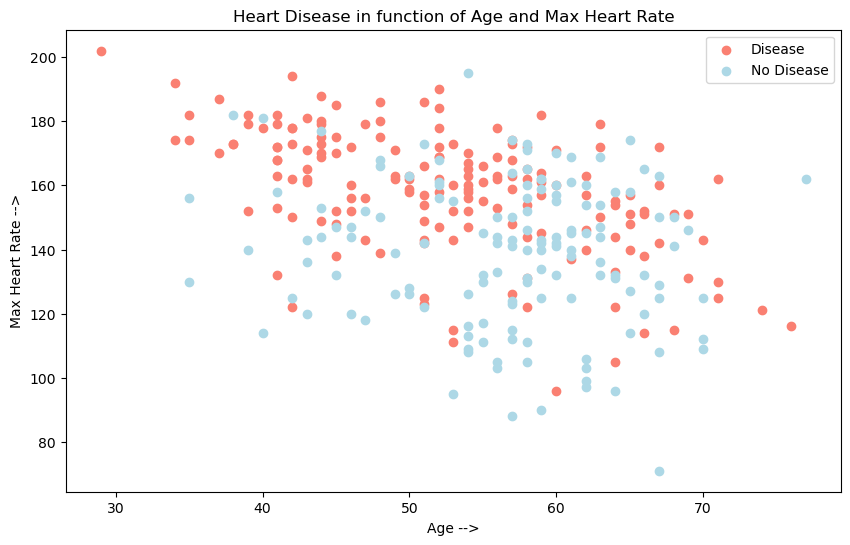

In [14]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
#Add some helful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age -->")
plt.ylabel("Max Heart Rate -->")
plt.legend(["Disease","No Disease"])
plt.show();

In [15]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# # Assuming y_true are true labels and y_pred are predicted labels
# skplt.metrics.plot_confusion_matrix(y_true,y_pred,normalize=True)
# plt.show()

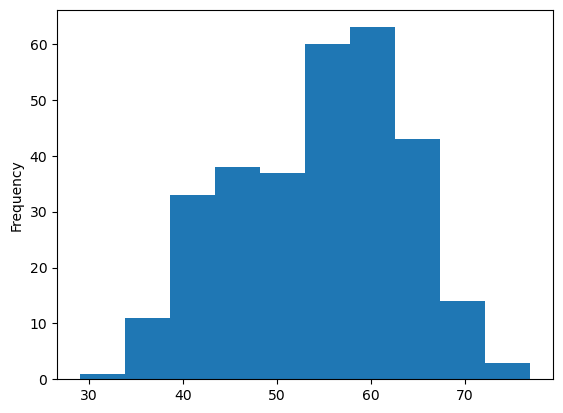

In [16]:
# Chech the distribution of age column with a histogram
df.age.plot.hist()
plt.show()

### Heart Disease Frequency  per Chest Pain Type
 cp - chest pain type
 
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    
    - 1: Atypical angina: chest pain not related to heart
    
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    - 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


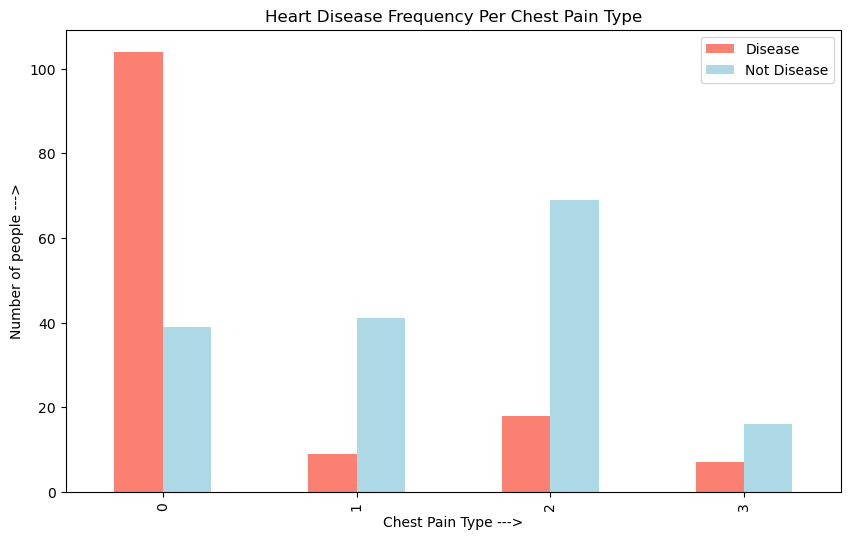

In [18]:
# Make a crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize= (10,6),color = ["salmon","lightblue"])
#Add some comunication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type --->")
plt.ylabel("Number of people --->")
plt.legend(["Disease","Not Disease"])
plt.show();

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


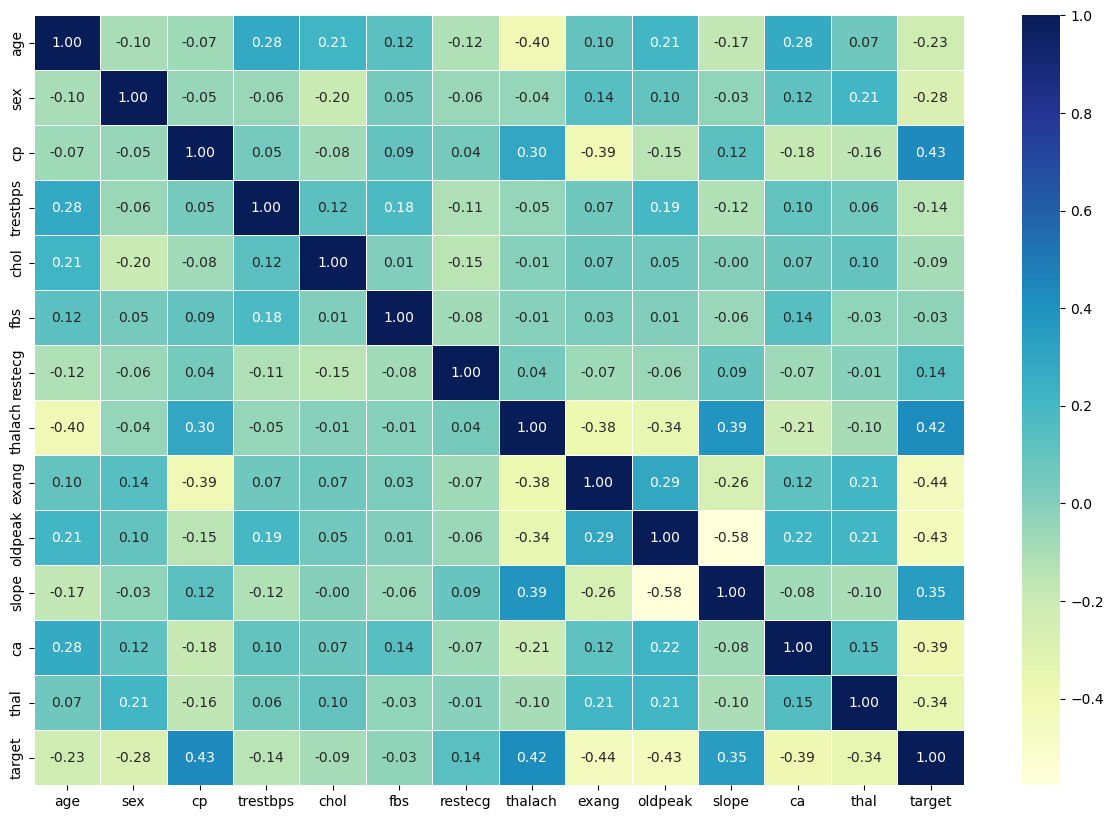

In [21]:
# Lat's Make our Corelation matrics little visual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
plt.show();


## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into x & y
x = df.drop("target", axis=1)

y = df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# Split data into train & test sets
np.random.seed(42)

#Split into train & test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data into train & test set , it's time to build a machine learning model

we will train it and (find patters) on the traning set.

And we will test it (use patterns) on the test set.

We are goint to try 3 machine learning model
1. Logistic Regression.
2. K-Nearest Neghbours Classifier.
3. Random Forest Classifire.

In [29]:
# Put models in a dictonary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    Fits and evaluate given machine learnings models.
    models : a dict of diffrent Scikit-learn machine learning models
    x_train : traning data(no labels)
    x_test:testing data(no lables)
    y_train : traning data(no labels)
    y_test:testing data(no lables)
    
    '''
    # Set random seed
    np.random.seed(42)
    #Make a dict to keep model scores
    model_scores = {}
    #Loop through model to the data
    for name,model in models.items(): # i.tems() is used for both keys & values 
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model & append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
    

In [30]:
model_scores = fit_and_score(models=models,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test=y_test)
model_scores

C:\Users\avk24\Conda\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

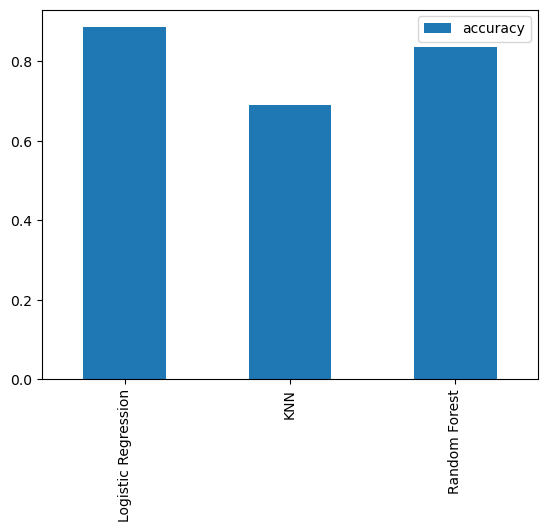

In [31]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();
plt.show();

Now we've got a baseline model...we know a model's first predictions aren't always what we should based our next steps off.What should we do ?

Let's look at the following:

* Hyperparameater tuning
* Feature importance
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameater tuming

In [90]:
# Let's une KNN

train_score = []
test_score = []

#Creat a list of diffrent values for n_neghbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through diffrent n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(x_train,y_train)
    # Update the traning scores list
    train_score.append(knn.score(x_train,y_train))
    # Update the test scores list
    test_score.append(knn.score(x_test,y_test))

In [33]:
# train_score

In [34]:
# test_score

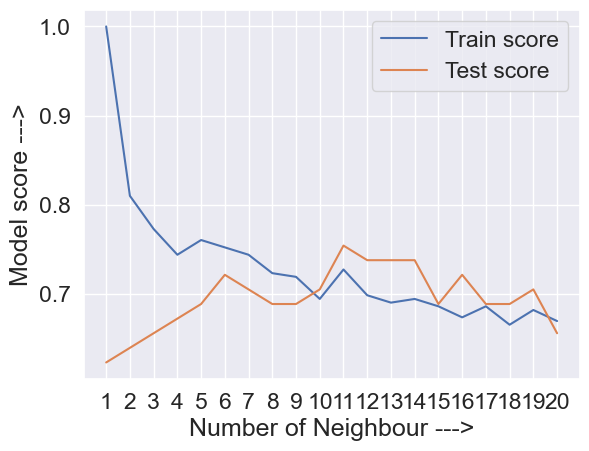

Maximum KNN score on the test data: 75.41%


In [91]:
plt.plot(neighbors,train_score,label="Train score")
plt.plot(neighbors,test_score,label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbour --->")
plt.ylabel("Model score --->")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

## Hyperparameater tuning with RandamizeSearchCV

we're going to tune :

* LogisticRegression()
* RandomForestClassifier()


.... using RandomizeSearchCV

In [36]:
# Create a hyperparameater grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
# Create a hyperparameater grid for RandomForestClassifier()
rf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameaters grids setup for each of our model,

Now let's tune them using RandomizeSearchCV...

In [37]:
# Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameater search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameater search for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do same for RandomForestClassifier()

In [40]:
# Setup random seed
np.random.seed(42)

#Setup random hyperparameater search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv =5,
                           n_iter=20,
                           verbose=True) # n_ier means randomlly try 20 of them

#Fit random hyperparameater search for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best best hyperparameaters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
# Evaluate the Randamizesearch RandomForestClassifier()
rs_rf.score(x_test,y_test)

0.8688524590163934

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameater Tuning with GridSearchCV

scince our LogisticRegession model provides the best score so far ,
we'll try and improve them again with GridSearchCV...

In [44]:
# Diffrent hyperparameater for lofisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                 "solver":["liblinear"]}
# Setup grid hyperparameater search for lofisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv =5,
                          verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy

* ROC curve & AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


.... and it would if cross- validation was used where posible.

To make comparisions and evaluate our trained model,first we need to make preditions.

In [47]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [50]:
# we have to find fpr and tpr to get ROC curve first we need to calculate y_probablity
y_prob = gs_log_reg.predict_proba(x_test)
y_prob[:5]

array([[0.86725261, 0.13274739],
       [0.24408482, 0.75591518],
       [0.18547574, 0.81452426],
       [0.94530775, 0.05469225],
       [0.11546636, 0.88453364]])

In [51]:
# we will get y proba positive by fetching all 1st values in each element in the y_prob
y_prob_positive = y_prob[:,1]
y_prob_positive[:5]

array([0.13274739, 0.75591518, 0.81452426, 0.05469225, 0.88453364])

In [52]:
# Now we will find values of fpr,tpr 
fpr,tpr,treshold = roc_curve(y_test,y_prob_positive)

# #Now we will plot the graph
# RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=float,estimator_name=str)
# plt.show()

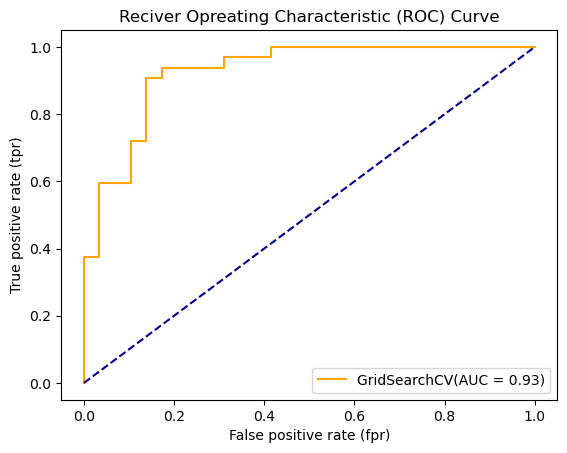

In [53]:
def plot_roc_curve(fpr,tpr):
    '''
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of the model.
    '''
    #Plot roc curve
    plt.plot(fpr,tpr,color = 'orange',label=f"GridSearchCV(AUC = {(roc_auc_score(y_test,y_prob_positive)):.2f})")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")


    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Opreating Characteristic (ROC) Curve")
    plt.legend() # leging will take all the lables that is menshioned while ploting roc & baseline code
    plt.show()    

plot_roc_curve(fpr,tpr)

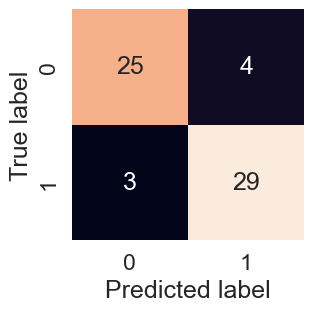

In [54]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.show()
    
plot_conf_mat(y_test, y_preds)# This is metrics

Now we have got ROC curve,an AYC metric and confusion matrix, let's get classification report as well as cross-validated precision recall and f1 score.

In [56]:
print(classification_report(y_test,y_preds)) # Clculated on one split

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

we are going to calculate precition ,recall and fi-score of our model using cross-validation snd to do so we will be using `cross_val-score`

In [57]:
# Check best hyperparameaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Creat a new Classifier with best parameaters
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [66]:
# Cross - validation accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [67]:
np.mean(cv_acc)

0.8446994535519124

In [70]:
# Cross - validation precition
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [71]:
# cross - validated recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [72]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

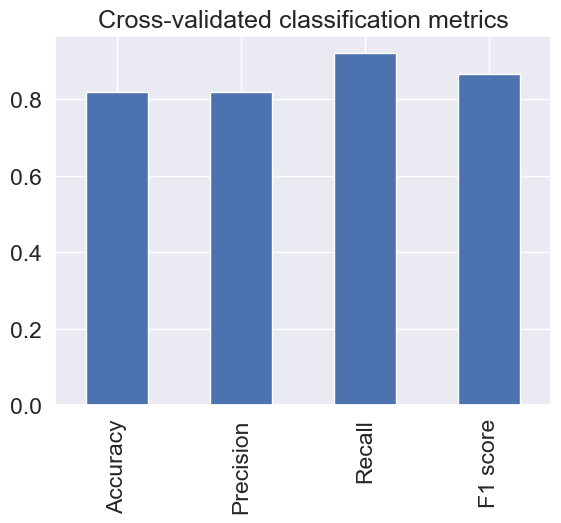

In [89]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1 score":cv_f1})

cv_metrics.iloc[0].T.plot.bar(title="Cross-validated classification metrics",legend=False);
plt.show();

### Feature importance
Feature importance is anothe as askinh,"which features contributed most to the outcome of the model and how did they contribute ?"

Fiding feature importance is diffrent for each machine learning modelOn way to find feature importance to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticReggression model...

In [ ]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression()